# Exploratory data analysis: Bike Sharing Dataset

In [67]:
# Load packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import altair as alt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## 1. Description of the dataset

 The dataset we chose is the Bike Sharing Dataset from [UCI machine learning repository]("https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset"). This dataset contains the hourly and daily count of rental bikes in 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information. It is provided by Hadi Fanaee-T, Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto.

# 2. Load the dataset

We downloaded and splitted the dataset into 80% train set and 20% test using the [download script]("https://github.com/UBC-MDS/DSCI_522_Group_409/blob/master/src/data_download.py") in our group repo.

In [88]:
# Load the dataset
bike_data_train = pd.read_csv("../data/train.csv")
bike_data_train_target = pd.read_csv("../data/train_target.csv")

# Combine the feature and target
bike_data = pd.concat([bike_data_train, bike_data_train_target], axis = 1)

# Preview
bike_data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0         1714  2011-03-17       1   0     3   1        0        4   
1        12835  2012-06-23       3   1     6  23        0        6   
2         8841  2012-01-09       1   1     1   4        0        1   
3        13930  2012-08-08       3   1     8  14        0        3   
4         9889  2012-02-22       1   1     2   1        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
13898    16305  2012-11-17       4   1    11   2        0        6   
13899       80  2011-01-04       1   0     1  11        0        2   
13900    12120  2012-05-25       2   1     5   4        0        5   
13901    14148  2012-08-17       3   1     8  16        0        5   
13902     5641  2011-08-28       3   0     8  11        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               1           1  0.36  0.3485  0.71     0.2239       1   
1               0           1  0.72  0.6515  0.44     0.0000      69   
2               1           1  0.22  0.2424  0.64     0.1045       0   
3               1           2  0.80  0.7424  0.52     0.2537      63   
4               1           1  0.32  0.3333  0.70     0.1343       3   
...           ...         ...   ...     ...   ...        ...     ...   
13898           0           1  0.26  0.2576  0.65     0.1940       8   
13899           1           1  0.22  0.2121  0.51     0.2985       7   
13900           1           2  0.62  0.5606  0.88     0.0000       3   
13901           1           2  0.84  0.2424  0.32     0.4478     116   
13902           0           1  0.70  0.6515  0.58     0.3881      59   

       registered  cnt  
0              11   12  
1             156  225  
2               4    4  
3             173  236  
4               4    7  
...           ...  ...  
13898          41   49  
13899          50   57  
13900           6    9  
13901         372  488  
13902         178  237  

[13903 rows x 17 columns]

# 3. Explore the dataset

### 3.1 Pandas Profile Report
We initially explored this dataset by using the pandas profile report. 

In [34]:
profile = ProfileReport(bike_data)
profile

**Findings from the pandas profile report:**
1. The target `cnt` (i.e. count of total rental bikes) is highly correlated with `registered` (i.e. count of registered users). Since our research question does not care about whether the user is registered or casual users. We decided to remove `registered` and `casual` columns.
2. The report is showing that `temp` and `atemp` are highly correlated with each other. They both are normalized temperatures in Celsius while `atemp` is the feeling temperature and `temp` is the real temperature. We decided to create a new column called `temp_actual` (i.e. the non-normalized actual temperature) and remove `temp` and `atemp` columns.
3. `dtday` is a DateTime column, which has a high cardinality. We decided to remove it because there are other time-related columns, such as `mnth` and `hr`, we can use to answer our research question.

### 3.2 Further explore

After using pandas profile report, we also further explored some useful features in our dataset as below.

In [57]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 17 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 1.8+ MB


In [56]:
bike_data.describe()

instant        season            yr          mnth            hr  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean    8701.550960      2.506581      0.502697      6.550601     11.565993   
std     5009.241014      1.105796      0.500011      3.425914      6.895803   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     4369.500000      2.000000      0.000000      4.000000      6.000000   
50%     8691.000000      3.000000      1.000000      7.000000     12.000000   
75%    13047.500000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.028195      2.997051      0.680788      1.426527      0.498538   
std        0.165537      2.010383      0.466188      0.639350      0.192675   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      0.980000   

              atemp           hum     windspeed        casual    registered  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.477102      0.626504      0.190027     36.290872    154.357621   
std        0.172016      0.193304      0.122040     50.081632    151.104995   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.470000      0.104500      4.000000     35.000000   
50%        0.484800      0.620000      0.194000     17.000000    116.000000   
75%        0.621200      0.780000      0.253700     49.000000    221.000000   
max        1.000000      1.000000      0.850700    362.000000    886.000000   

                cnt  
count  13903.000000  
mean     190.648493  
std      181.565047  
min        1.000000  
25%       40.000000  
50%      143.000000  
75%      283.000000  
max      977.000000

In [55]:
print("The dataframe columns are: ", list(bike_data.columns), "\n")

month_list = sorted(list(bike_data['mnth'].unique()))
print("- The month ranges from {0} to {1} and there are {2} months: ".format(month_list[0],
                                                                           month_list[-1],
                                                                           len(month_list)),"\n")

hour_list = sorted(list(bike_data['hr'].unique()))
print("- The hour ranges from {0} to {1} and there are {2} hours: ".format(hour_list[0],
                                                                           hour_list[-1],
                                                                           len(hour_list)),"\n")

print("- The holiday type contains: ", list(bike_data['holiday'].unique()),"\n")

print("- The weekday type contains: ", list(bike_data['weekday'].unique()),"\n")

print("- The workingday type contains: ", list(bike_data['workingday'].unique()),"\n")

print("- The weather type contains: ", list(bike_data['weathersit'].unique()),"\n")

temp_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized tempereature ranges from {0} to {1}".format(temp_list[0],
                                                                    temp_list[-1]), "\n")

hum_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized humidity ranges from {0} to {1}".format(hum_list[0],
                                                                hum_list[-1]), "\n")


wind_list = sorted(list(bike_data['windspeed'].unique()))
print("- The normalized windspeed ranges from {0} to {1}".format(wind_list[0],
                                                                wind_list[-1]), "\n")

cnt_list = sorted(list(bike_data['cnt'].unique()))
print("- The target count of bike rentals ranges from {0} to {1}".format(cnt_list[0],
                                                                cnt_list[-1]), "\n")

The dataframe columns are:  ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'] 

- The month ranges from 1 to 12 and there are 12 months:  

- The hour ranges from 0 to 23 and there are 24 hours:  

- The holiday type contains:  [0, 1] 

- The weekday type contains:  [4, 6, 1, 3, 2, 5, 0] 

- The workingday type contains:  [1, 0] 

- The weather type contains:  [1, 2, 3, 4] 

- The normalized tempereature ranges from 0.02 to 0.98 

- The normalized humidity ranges from 0.02 to 0.98 

- The normalized windspeed ranges from 0.0 to 0.8507 

- The target count of bike rentals ranges from 1 to 977 



**Findings from further exploring**:
1. We found that most of the features are already normalized, which would be great when building the machine learning model. 
2. During EDA, 3 columns (i.e. `temp`, `hum`, `windspeed`) required to be transformed back to the non-normalized numbers so that we can better interpret the relationship between these features and the target.
3. There are 4 categorical columns (i.e. `holiday, weekday`, `workingday`, `weatherday`) which is already coded as numbers in the dataset. We will use the following descriptions from the source website to interpret these columns in our analysis.

    - holiday : Yes is 1, No is 0
    - weekday : Day of the week, starting from Sunday being 0
    - workingday : Yes is 1, No is 0
    - weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

### 3.3 Checking the Null Values in the dataset

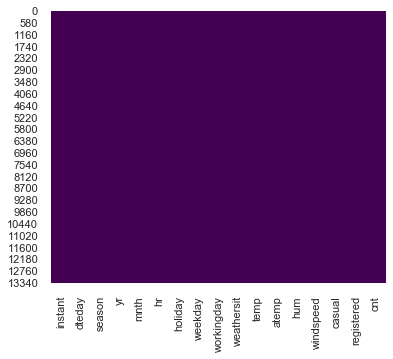

In [61]:
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(bike_data.isnull(), cmap='viridis', cbar=False)

**Findings**: As we can see from the plot above, there is no null values in the dataset.

## 4. Initial Thoughts

> .....  TO DO 


## 5. Wrangling

In [89]:
# Drop the unnecssary columns discussed in Section 3
bike_data = bike_data.drop(['instant', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

# Create a new non-normalized actual temperature column and remove the `temp` column
bike_data['temp_actual'] = bike_data['temp'].apply(lambda x: x*47 - 8)
bike_data = bike_data.drop(['temp'], axis = 1)

# Transform the weekday column back to categorical
bike_data['weekday'] = bike_data['weekday'].replace(
                                {0: 'Sunday',
                                 1: 'Monday',
                                 2: 'Tuesday',
                                 3: 'Wednesday',
                                 4: 'Thursday',
                                 5: 'Friday',
                                 6: 'Saturday'})

bike_data

season  mnth  hr  holiday    weekday  workingday  weathersit   hum  \
0           1     3   1        0   Thursday           1           1  0.71   
1           3     6  23        0   Saturday           0           1  0.44   
2           1     1   4        0     Monday           1           1  0.64   
3           3     8  14        0  Wednesday           1           2  0.52   
4           1     2   1        0  Wednesday           1           1  0.70   
...       ...   ...  ..      ...        ...         ...         ...   ...   
13898       4    11   2        0   Saturday           0           1  0.65   
13899       1     1  11        0    Tuesday           1           1  0.51   
13900       2     5   4        0     Friday           1           2  0.88   
13901       3     8  16        0     Friday           1           2  0.32   
13902       3     8  11        0     Sunday           0           1  0.58   

       windspeed  cnt  temp_actual  
0         0.2239   12         8.92  
1         0.0000  225        25.84  
2         0.1045    4         2.34  
3         0.2537  236        29.60  
4         0.1343    7         7.04  
...          ...  ...          ...  
13898     0.1940   49         4.22  
13899     0.2985   57         2.34  
13900     0.0000    9        21.14  
13901     0.4478  488        31.48  
13902     0.3881  237        24.90  

[13903 rows x 11 columns]

## 6. Research Questions

Our main predictive research question is:
> Given the information shared by Bike share company, can we predict the count of bike rentals in order to forecast the future demand?

Another sub questions is:
> Identify the stronges predictors that can help in predicting the future demand for the bike rentals.

## 7. Data Analysis & Visualizations

### 7.1 Analysis of temp on bike rental count 

!! TO DO: description of the plot and how it can help to answer the research question.

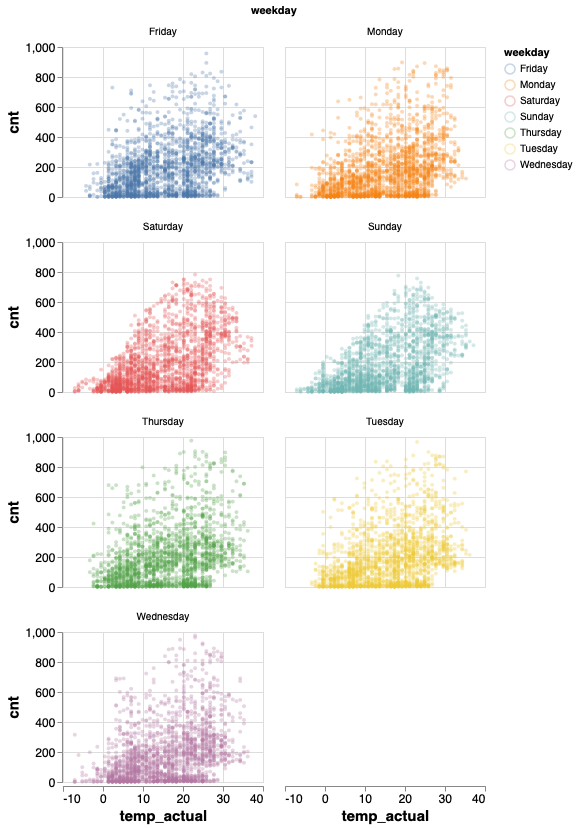

In [100]:
chart = alt.Chart(bike_data).mark_point(opacity=0.3, size = 4).encode(
            alt.X('temp_actual:Q'),
            alt.Y('cnt:Q'),
            color = 'weekday:N'
        ).properties(title="Temp vs Bike Rental",
                    width=200, height=150
        ).facet(facet='weekday:N',
                columns=2
        ).configure_axisX(labelFontSize=12,
                        titleFontSize=15
        ).configure_axisY(labelFontSize=12,
                        titleFontSize=15
        ).configure_title(fontSize=17)
chart

**Observations**: TO DO

### 7.2 Analysis of hour and weekday on bike rental count 

!! TO DO: description of the plot and how it can help to answer the research question.

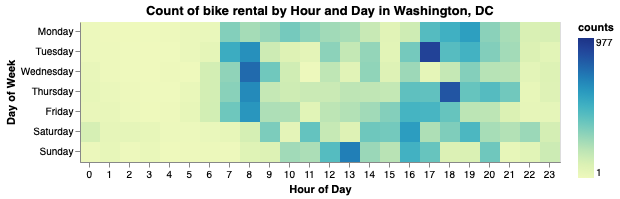

In [101]:
heat_map = alt.Chart(bike_data).mark_rect().encode(
                x = alt.X("hr:O", 
                          title = "Hour of Day", 
                          axis = alt.Axis(labelAngle = 0)),
                y = alt.Y('weekday:O',
                          sort=["Monday", "Tuesday", "Wednesday", 
                                "Thursday", "Friday", "Saturday", "Sunday"],
                          title = "Day of Week"),
                color=alt.Color('cnt:Q', 
                                legend=alt.Legend(title = "counts"))
            ).properties(title = "Count of bike rental by Hour and Day in Washington, DC")
heat_map

**Observations**: TO DO

For Victor: Please add in the correlation matrix and any other plots you want to put in this section.